In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


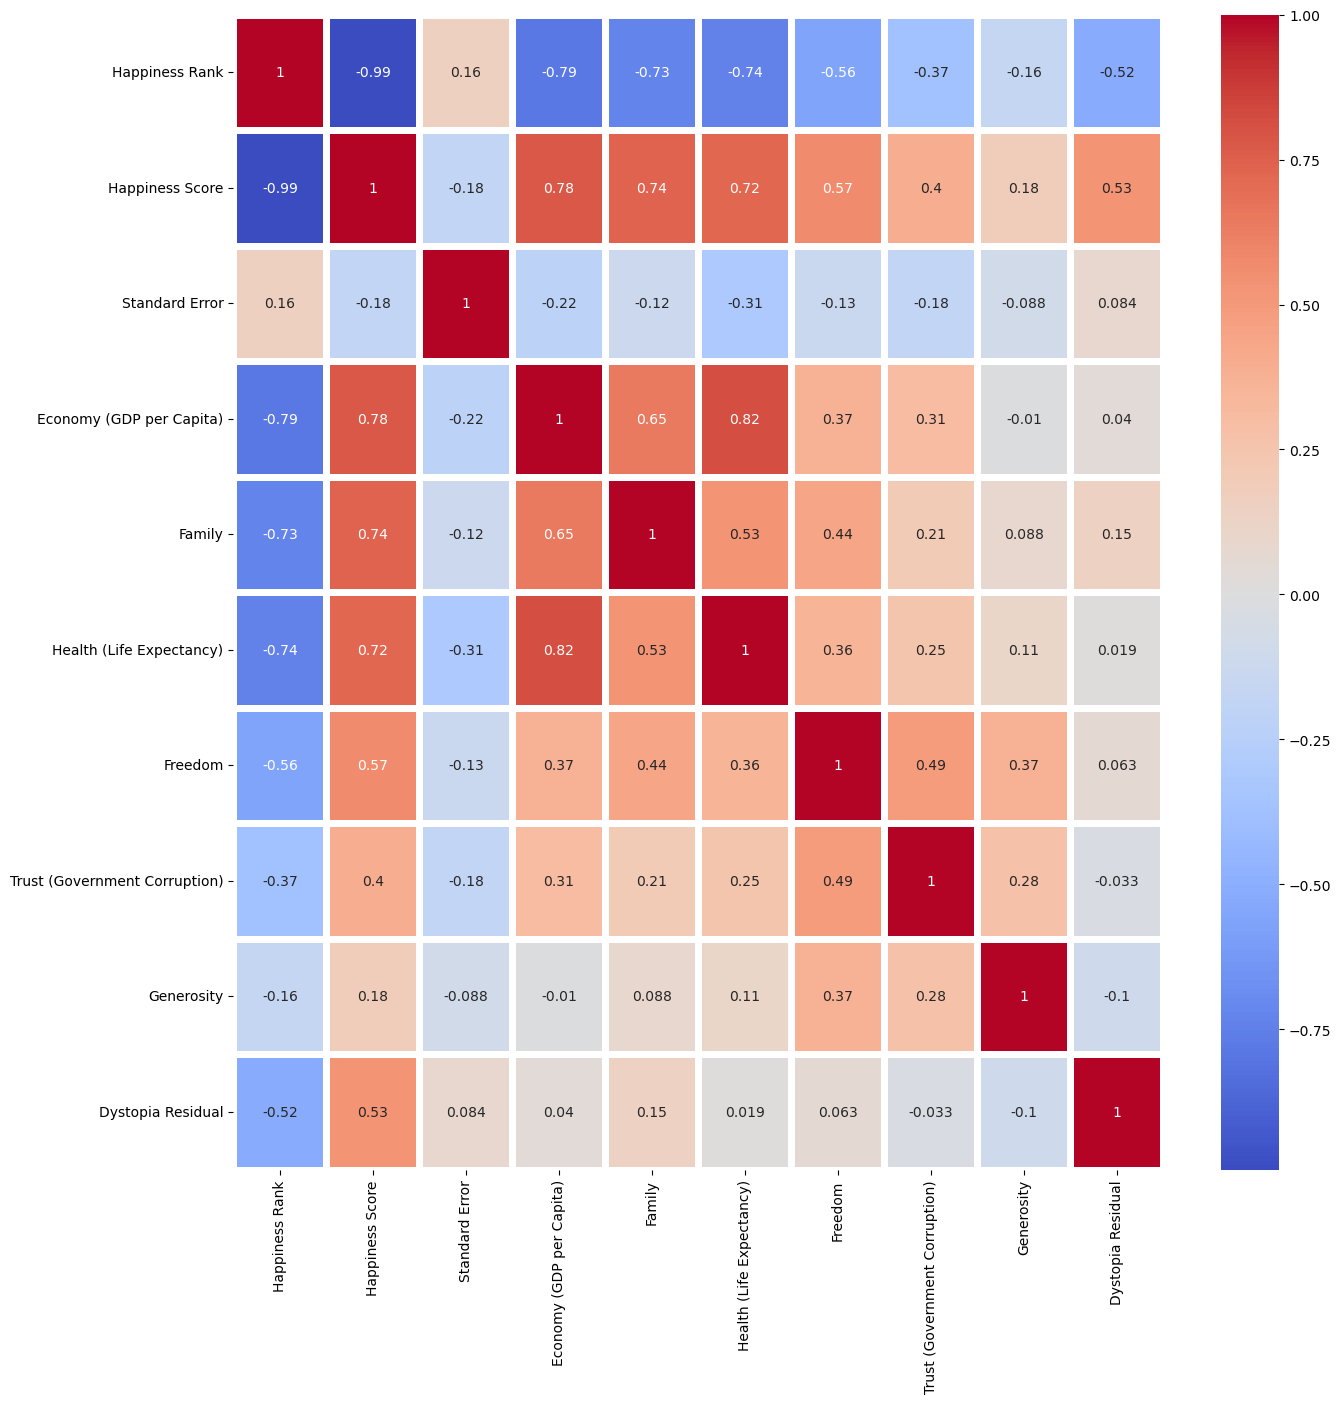

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidth=5)
plt.show()

In [8]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [9]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [10]:
df.isnull().value_counts()


Country  Region  Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
False    False   False           False            False           False                     False   False                     False    False                          False       False                158
dtype: int64

In [11]:
new_df=df[df.columns[3:]]
new_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [12]:
x=new_df.drop(columns=['Happiness Score'])
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [13]:
y=new_df['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [14]:
x.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [15]:
x['Standard Error']=boxcox(x['Standard Error'],0)

In [16]:
x.skew()

Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [17]:
x.corr()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Standard Error,1.000000,-0.223477,-0.133812,-0.320471,-0.171718,-0.187226,-0.124805,0.052531
Economy (GDP per Capita),-0.223477,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.133812,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.320471,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.171718,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.187226,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.124805,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.052531,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


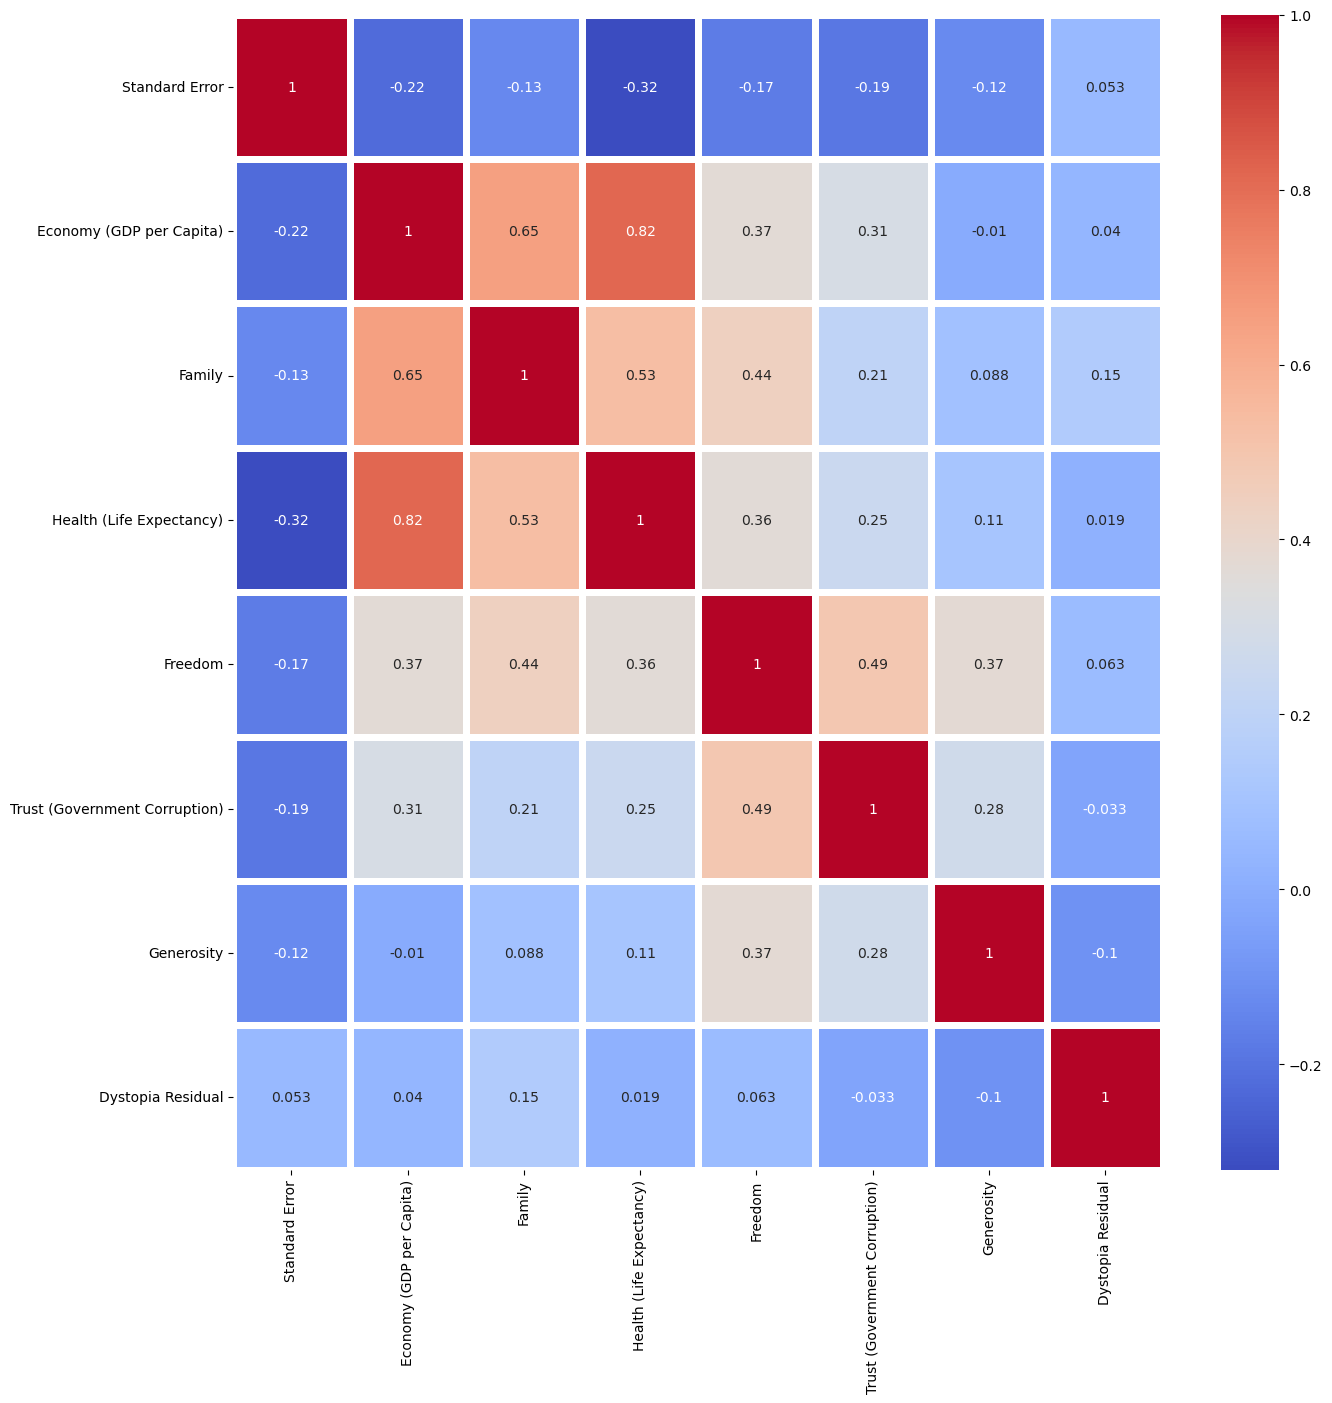

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm',linewidth=5)
plt.show()

In [19]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [20]:
a=df.sort_values(by='Happiness Score', ascending=False).head(10)
a

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [21]:
b=df.sort_values(by='Happiness Score', ascending=True).head(10)
b

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


<span style="color:red;font-size: 20px;font-family: verdana;font-weight: bold ">From above table, It concludes that, seven contries belongs to the Sub-Saharan Africa region, having less Happiness scores </span>

<span style="color:green;font-size: 20px;font-family: verdana;font-weight: bold ">Lets Sort Regionwise below</span>

<span style="color:magenta;font-size: 20px;font-family: verdana;font-weight: bold ">After Sorting Regionwise, We have checked Statistics of HAPPINESS SCORE Regionwise. </span>

In [22]:
region_sort=df.groupby('Region')
region_sort['Happiness Score'].describe().sort_values(by='mean', ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">Concluded that Australia, Newzealand are tha Happiest Region in the world and Sub-Saharan Africa is least Happiest Region </span>

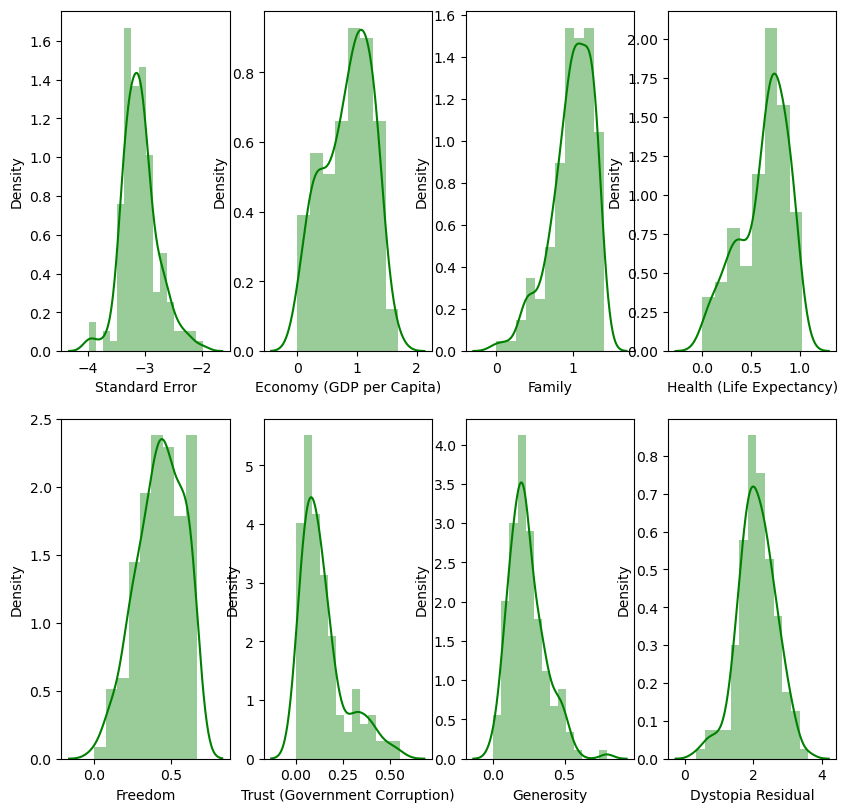

In [23]:
plt.figure(figsize=(10,15),facecolor='white')
plotnum=1
for i in x.columns:
    if plotnum<12:
        xh=plt.subplot(3,4,plotnum)
        sns.distplot(x[i], color='g')
        plt.xlabel(i, fontsize=10)
        #plt.ylabel(rotation=0, fontsize=10)
    plotnum+=1
plt.show()

<span style="color:black;font-size: 20px;font-family: verdana;font-weight: bold ">Checking Outliers Using BOXPLOTS.</span>

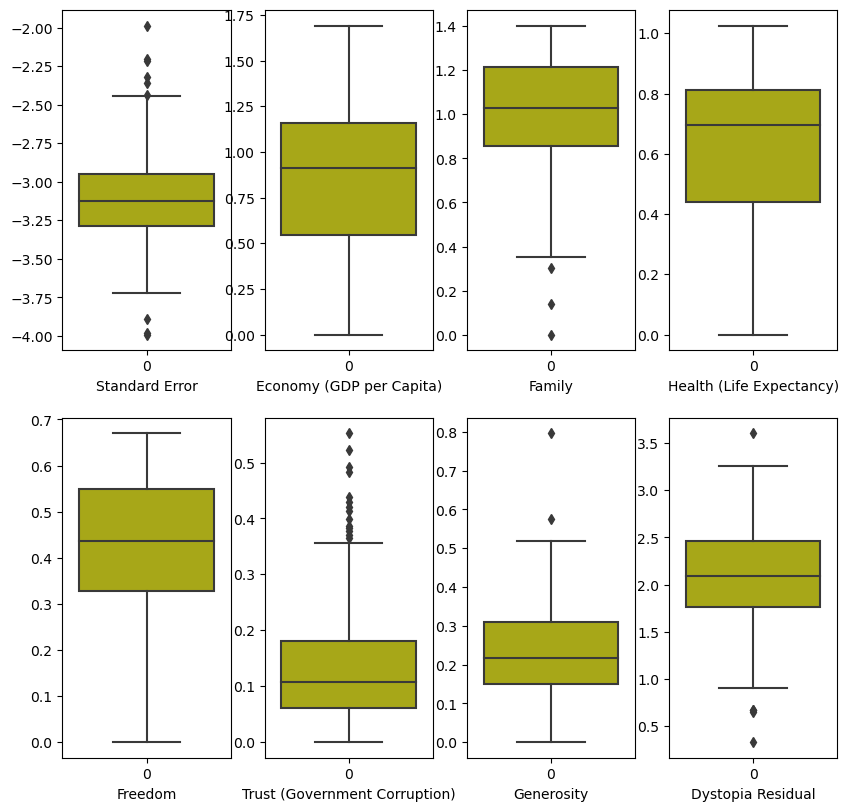

In [24]:
plt.figure(figsize=(10,15), facecolor='white')
plotbox=1
for j in x.columns:
    if plotbox<12:
        bc=plt.subplot(3,4,plotbox)
        sns.boxplot(x[j], color='y')
        plt.xlabel(j, fontsize=10)
    plotbox+=1
plt.show()

<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">Lets Check VIF to Asses Multicollinearity</span>

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
len(x.columns)

8

In [26]:
vif['values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['features']=x.columns
vif

,values,features
0,27.556233,Standard Error
1,22.304414,Economy (GDP per Capita)
2,26.891252,Family
3,24.911354,Health (Life Expectancy)
4,15.965214,Freedom
5,3.471763,Trust (Government Corruption)
6,5.810159,Generosity
7,14.295404,Dystopia Residual


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">From Above VIF, we need to check Correlation from df.corr() </span>

<span style="color:blue;font-size: 10px;font-family: verdana;font-weight: bold ">It has been concluded that, Standard Error, Health are least corelated among High VIF variable like, Standard Error, Economy, Family, Health </span>

<span style="color:magenato;font-size: 20px;font-family: verdana;font-weight: bold ">Now, we will drop Standard Error and Health column from DataFrame to Manage MultiCollinearity</span>

In [27]:
df.drop(['Standard Error','Health (Life Expectancy)'], axis=1, inplace=True)

In [28]:
df


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


In [29]:
df2=df[df.columns[3:]]
df2


,Happiness Score,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


In [30]:
x1=df2.drop(columns=['Happiness Score'])
x1

,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...
153,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


In [31]:
y1=new_df['Happiness Score']
y1

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">MACHINE LEARNING MODELS</SPAN>

In [32]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.3, random_state=46)

In [33]:
x1_train.shape

(110, 6)

In [34]:
x1_test.shape

(48, 6)

In [35]:
y1_train.shape

(110,)

In [36]:
y1_test.shape

(48,)

<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">Lets Find Best RANDOM STATE</span>

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)  # You may want to choose a specific random_state for reproducibility

rs = 0
max_r2_score = 0

for i in range(1, 200):
    lr = LinearRegression()
    lr.fit(x1_train, y1_train)
    pred = lr.predict(x1_test)
    r2 = r2_score(pred, y1_test)

    if r2 > max_r2_score:
        max_r2_score = r2
        rs = i

    #print("Current Accuracy is", r2, "on Random State", i)

print("Best Accuracy is", max_r2_score, "on Random State", rs)


Best Accuracy is 0.9813555016043307 on Random State 1


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso,Ridge

<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION MODEL </span>

In [44]:
Lr=LinearRegression()
Lr.fit(x1_train, y1_train)
pred_Lr=Lr.predict(x1_test)
pred_train=Lr.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_Lr)))

r_2 score 0.9806464191855071
r_2 score on Training Data 0.9864669500756257
Mean Absolute Error: 0.10272522259748847
Mean Square Error: 0.018961501988366738
Root Square Error: 0.13770076974500448


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Random Forest Regressor </span>

In [45]:
RFR=RandomForestRegressor()
RFR.fit(x1_train, y1_train)
pred_RFR=RFR.predict(x1_test)
pred_train=RFR.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_RFR)))

r_2 score 0.8975789427295138
r_2 score on Training Data 0.9873360372258569
Mean Absolute Error: 0.24330187500000022
Mean Square Error: 0.10034613747708349
Root Square Error: 0.31677458464511243


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">K NEARSET NEIGHBOUR </span>

In [46]:
knn=KNN()
knn.fit(x1_train, y1_train)
pred_knn=knn.predict(x1_test)
pred_train=knn.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_knn ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_knn)))

r_2 score 0.9211323785641055
r_2 score on Training Data 0.9598166489682836
Mean Absolute Error: 0.21924583333333328
Mean Square Error: 0.07726986416666666
Root Square Error: 0.27797457467665393


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Gradient Boost Regressor </span>

In [47]:
gbb=GradientBoostingRegressor()
gbb.fit(x1_train, y1_train)
pred_gbb=gbb.predict(x1_test)
pred_train=gbb.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_gbb)))

r_2 score 0.9145673022707794
r_2 score on Training Data 0.9991896554698911
Mean Absolute Error: 0.21134647420386696
Mean Square Error: 0.08370194040014904
Root Square Error: 0.28931287631239133


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">LASSO MODEL </span>

In [48]:
lasso=Lasso()
lasso.fit(x1_train, y1_train)
pred_lasso=lasso.predict(x1_test)
pred_train=lasso.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_lasso)))

r_2 score -0.009475056056826414
r_2 score on Training Data 0.0
Mean Absolute Error: 0.8687708333333332
Mean Square Error: 0.9890243808677687
Root Square Error: 0.9944970492001315


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">RIDGE MODEL </span>

In [50]:
rd=Ridge()
rd.fit(x1_train, y1_train)
pred_rd=rd.predict(x1_test)
pred_train=rd.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_rd ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_rd)))

r_2 score 0.9763606839601332
r_2 score on Training Data 0.9821514590806275
Mean Absolute Error: 0.11240473816888898
Mean Square Error: 0.02316041369243173
Root Square Error: 0.15218545821605864


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Decision Tree Regressor </span>

In [51]:
dtr= DecisionTreeRegressor()
dtr.fit(x1_train, y1_train)
pred_dtr=dtr.predict(x1_test)
pred_train=dtr.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_dtr)))

r_2 score 0.6824831177096697
r_2 score on Training Data 1.0
Mean Absolute Error: 0.4331458333333333
Mean Square Error: 0.3110843958333333
Root Square Error: 0.5577494023603551


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Support Vector Regressor </span>

In [52]:
svr=SVR()
svr.fit(x1_train, y1_train)
pred_svr=svr.predict(x1_test)
pred_train=svr.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_svr)))

r_2 score 0.6824831177096697
r_2 score on Training Data 0.9793864422212447
Mean Absolute Error: 0.1408964618020553
Mean Square Error: 0.034843638196833886
Root Square Error: 0.1866645070623601


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Extra Tree Regressor </span>

In [53]:
etr=ExtraTreesRegressor()
etr.fit(x1_train, y1_train)
pred_etr=etr.predict(x1_test)
pred_train=svr.predict(x1_train)
print("r_2 score", r2_score(y1_test,pred_etr ))
print("r_2 score on Training Data",r2_score(y1_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(y1_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred_etr)))

r_2 score 0.9151284514830212
r_2 score on Training Data 0.9793864422212447
Mean Absolute Error: 0.21423833333333328
Mean Square Error: 0.08315215935416681
Root Square Error: 0.28836116131366724


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Linear Regression and CVS </span>

In [55]:
score=cross_val_score(Lr, x1,y1, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_Lr ))

[ 0.920435    0.71955441  0.66420969 -0.22572454  0.73345891]
0.5623866930776151
Difference between r_2 score and Cross Validation score is 0.9806464191855071


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Random Forest Regressor and CVS </span>

In [56]:
score1=cross_val_score(RFR, x1,y1, cv=5)
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_RFR )- score1.mean())

[-6.93395769 -1.53400039 -0.66303053 -3.07398285 -5.69565603]
-3.580125498745167
Difference between r_2 score and Cross Validation score is 4.477704441474681


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of K Nearest Neighbour and CVS </span>

In [57]:
score2=cross_val_score(knn, x1,y1, cv=5)
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_knn )-score2.mean() )

[-6.89693057 -2.49036058 -1.3448057  -6.24247528 -5.27456495]
-4.449827416602014
Difference between r_2 score and Cross Validation score is 5.37095979516612


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Gradient Boost  and CVS </span>

In [58]:
score3=cross_val_score(gbb, x1,y1, cv=5)
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_gbb)-score3.mean() )

[-3.4991249  -1.29589423 -1.36357246 -3.69792477 -3.59906005]
-2.691115282580595
Difference between r_2 score and Cross Validation score is 3.6056825848513743


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Lasso Model and CVS </span>

In [59]:
score4=cross_val_score(lasso, x1,y1, cv=5)
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_lasso)-score4.mean() )

[-39.5383371  -12.87043242  -0.34005788 -30.73906532 -23.65659767]
-21.428898078346563
Difference between r_2 score and Cross Validation score is 21.419423022289738


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Ridge Model and CVS </span>

In [60]:
score5=cross_val_score(rd, x1,y1, cv=5)
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_rd )-score5.mean() )

[ 0.18765107  0.72805958  0.70452663 -0.35375164  0.57718203]
0.3687335346153058
Difference between r_2 score and Cross Validation score is 0.6076271493448274


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Decsssion Tree Regressor Model and CVS </span>

In [61]:
score6=cross_val_score(dtr, x1,y1, cv=5)
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_dtr )-score6.mean() )

[ -5.78226641 -11.90231207  -5.45611005 -14.43372542  -5.48667063]
-8.612216913965089
Difference between r_2 score and Cross Validation score is 9.294700031674758


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Support Vector Regressor and CVS </span>

In [62]:
score7=cross_val_score(svr, x1,y1, cv=5)
print(score7)
print(score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_svr)-score7.mean() )

[-1.62882239  0.5527176   0.51343615 -0.70166611 -1.73001288]
-0.5988695265527525
Difference between r_2 score and Cross Validation score is 1.5633054046742694


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Extra Trees Regressor Model and CVS </span>

In [63]:
score8=cross_val_score(etr, x1,y1, cv=5)
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y1_test,pred_etr)-score8.mean() )

[-6.69073919 -0.68224221 -0.2869989  -3.29475047 -5.15334072]
-3.221614298057389
Difference between r_2 score and Cross Validation score is 4.13674274954041


<span style="color:green;font-size: 20px;font-family: verdana;font-weight: bold ">From the Difference of Both r_2 score and cross_valid_score, we can conclude that RIDGE is the best fitting and best Performed model </span>

In [64]:
from sklearn.model_selection import GridSearchCV


<span style="color:MAGENTO;font-size: 22px;font-family: verdana;font-weight: bold ">GRID SEARCH CROSS VALIDATION: HYPERTUNING PARAMETER </span>

In [67]:
param = {'alpha': [0.1, 1, 10]}
ridge_model = Ridge()
gscv = GridSearchCV(ridge_model, param, cv=5)
gscv.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]})

<span style="color:magenta;font-size: 18px;font-family: verdana;font-weight: bold ">Finding optimum parameter or alpha value for Ridge Model to Perform GridSearchCV </span>

In [68]:
gscv.best_params_

{'alpha': 0.1}

In [69]:
Model=Ridge(alpha= 0.1)
Model.fit(x1_train, y1_train)
pred=Model.predict(x1_test)

print("r_2 score", r2_score(y1_test,pred ))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred ))
print("Mean Square Error:", mean_squared_error(y1_test,pred))
print("Root Square Error:", np.sqrt(mean_squared_error(y1_test,pred)))

r_2 score 0.9807575433329128
Mean Absolute Error: 0.10273557505762498
Mean Square Error: 0.01885262907424383
Root Square Error: 0.13730487636731561


<span style="color:Tomato;font-size: 30px;font-family: verdana;font-weight: bold ">SAVING OUR MODEL </span>

In [70]:
import pickle

In [71]:
import pickle
filename='happiness.pkl'
pickle.dump(Model, open(filename,'wb'))

In [72]:
loaded_model=pickle.load(open('happiness.pkl', 'rb'))
result=loaded_model.score(x1_test, y1_test)
print(result*100)

98.07575433329127


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">DEMONSTRATING PREDICTING AND ORIGINAL VALUES </span>

In [73]:
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:], y1_test[:]], index=['Predicted','Orginals'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Predicted,7.322571,6.001807,4.711796,4.349307,5.795875,4.867854,4.352992,3.877206,4.731276,4.947078,...,5.019379,4.780408,6.852478,4.745935,4.611771,5.082755,6.899361,5.821492,6.451414,5.383738
Orginals,7.364000,5.995000,4.633000,4.514000,5.716000,4.507000,4.512000,3.956000,4.686000,5.007000,...,4.642000,4.959000,6.611000,4.677000,4.681000,5.124000,6.937000,5.754000,6.505000,5.474000
